<a href="https://colab.research.google.com/github/KumaranShivam5/improved-succotash/blob/master/assignment2/ML_assign2_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

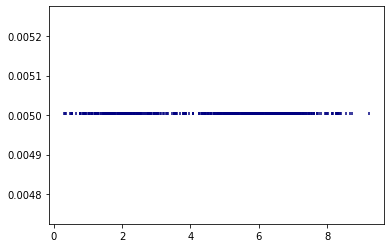

In [0]:
mu1=2
mu2=6
sigma1=0.8
sigma2=1
N=600

x1=np.random.normal(mu1,sigma1,200)
x2=np.random.normal(mu2,sigma2,400)


x=np.asarray(list(x1)+list(x2))
plt.scatter(x, np.ones(len(x))*0.005, color='navy', s=10, marker=2, label="Train data")
plt.show()

In [0]:
def pdf(x,mu,sigma):
    t=(1/(np.sqrt(2*np.pi*np.square(sigma))))*(np.exp(-(np.square(x-mu)/(2*np.square(sigma)))))
    return(t)

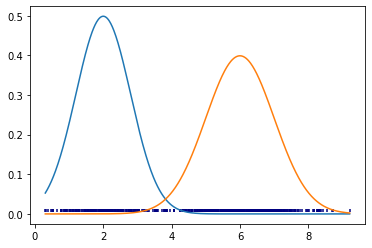

In [0]:
y=np.linspace(np.min(x),np.max(x),len(x))
x1_true=pdf(y,mu1,sigma1)
x2_true=pdf(y,mu2,sigma2)
plt.plot(y,x1_true)
plt.plot(y,x2_true)
plt.scatter(x, np.ones(len(x))*0.005, color='navy', s=10, marker=2, label="Train data")
plt.show()

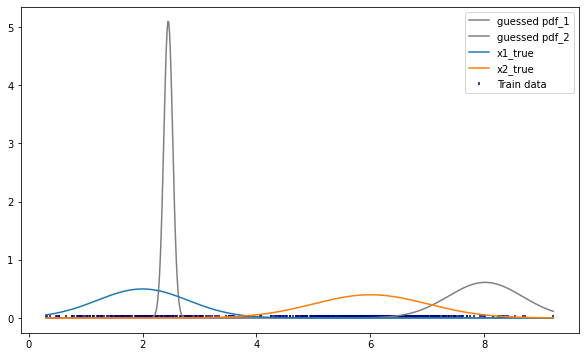

In [0]:
#calclating likelihood
k=2
mu=np.random.choice(x,k)
sigma=np.random.random_sample(size=k)
lam=[1/k]*k

#plotting the initialized pdfs
plt.figure(figsize=(10,6))
plt.plot(y,pdf(y,mu[0],sigma[0]),color='gray', label='guessed pdf_1')
plt.plot(y,pdf(y,mu[1],sigma[1]),color='gray',label='guessed pdf_2')
plt.plot(y,x1_true, label='x1_true')
plt.plot(y,x2_true,label='x2_true')
plt.scatter(x, np.ones(len(x))*0.005, color='navy', s=10, marker=2, label="Train data")
plt.legend()
plt.show()

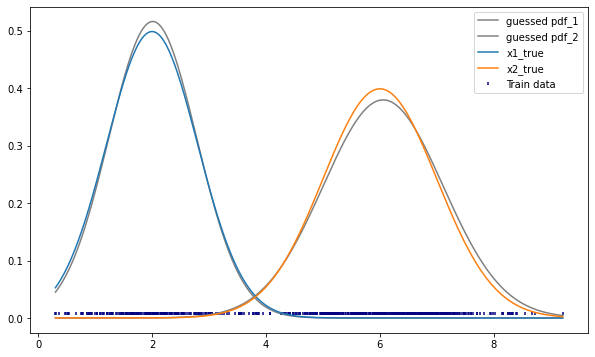

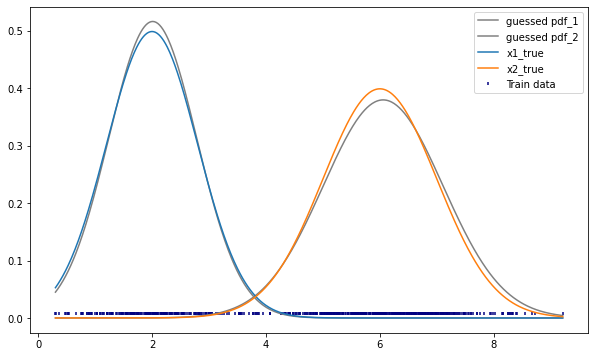

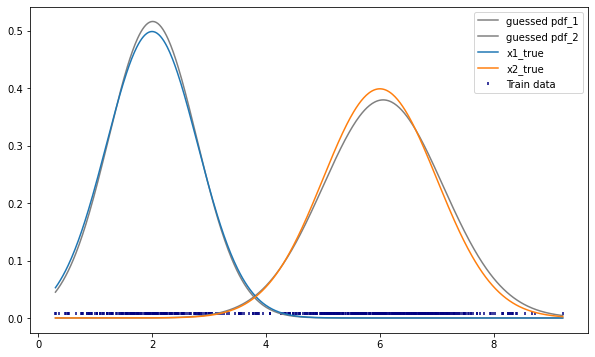

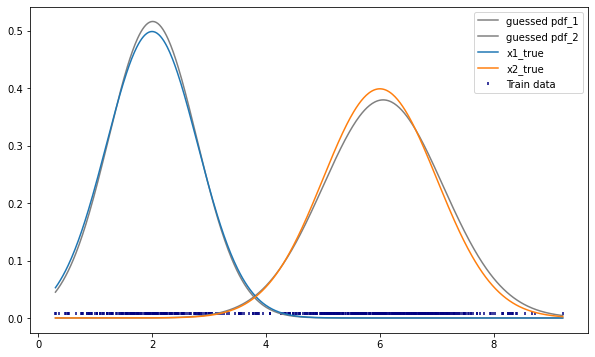

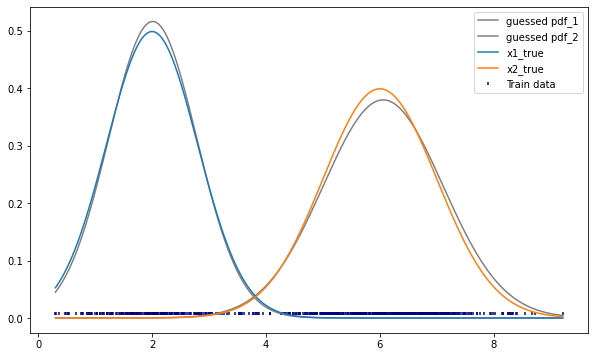

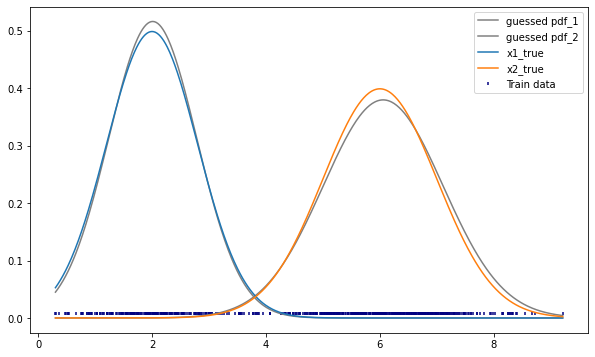

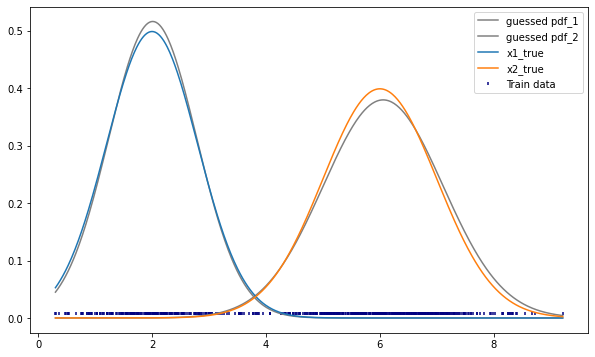

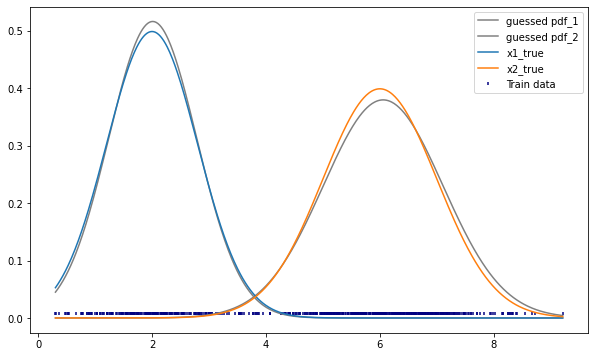

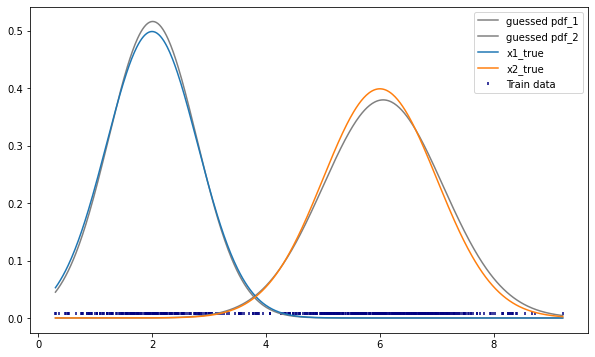

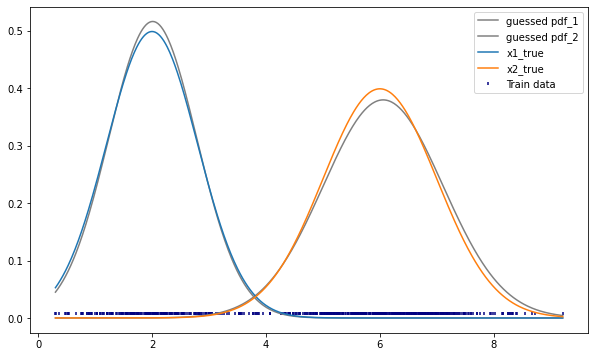

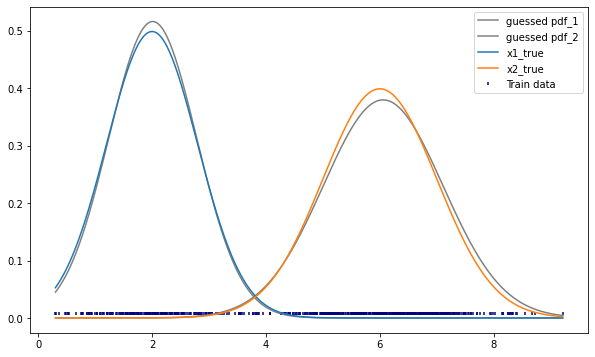

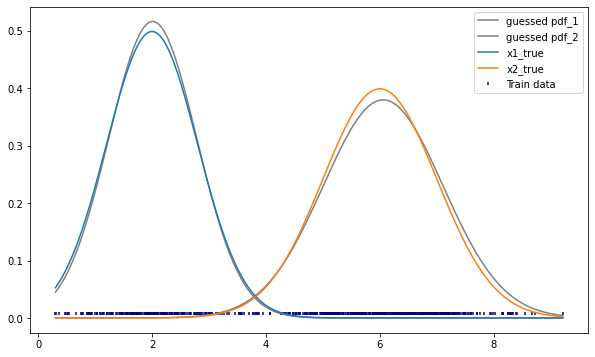

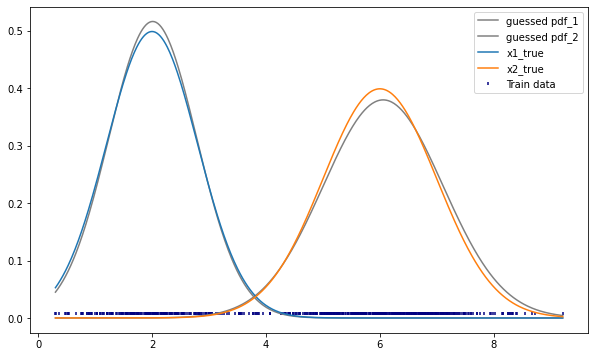

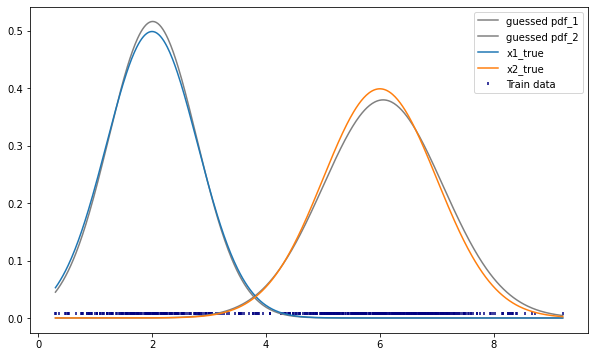

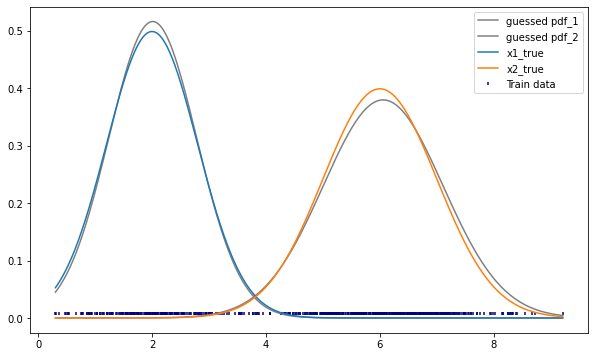

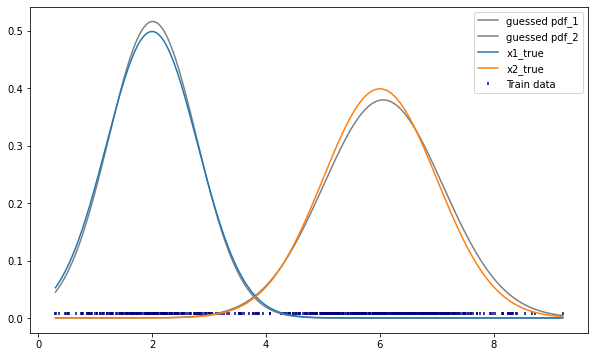

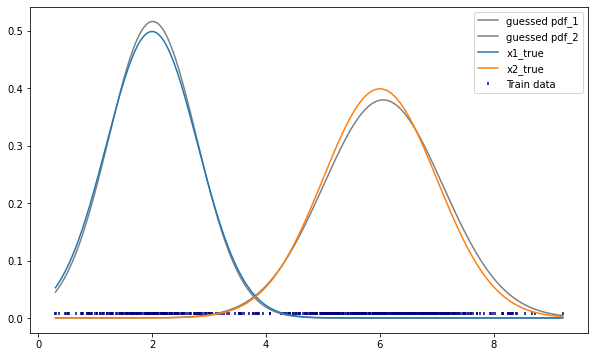

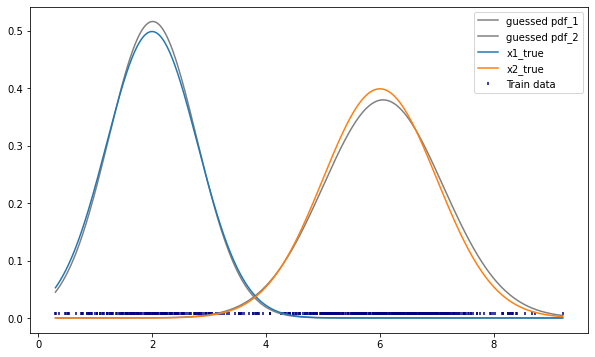

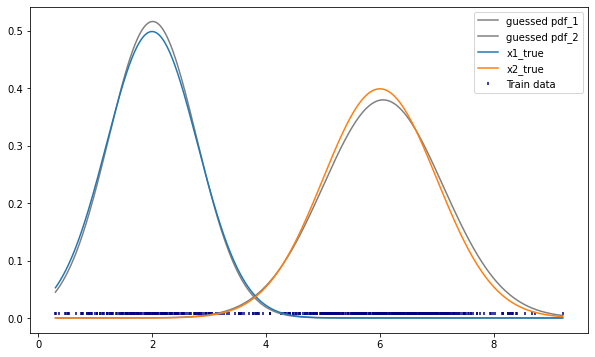

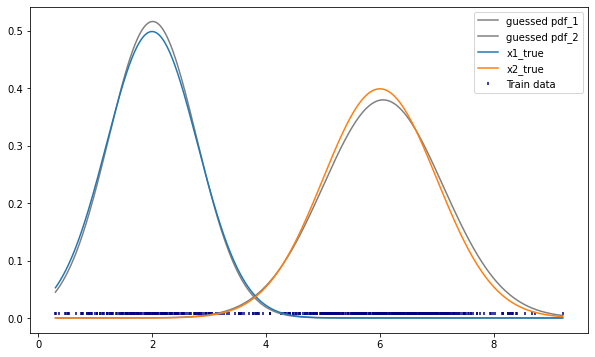

In [0]:
e=1e-8

for j in range(20):
    lh=[]
    b=[]
    for j in range(k):
        lh.append(pdf(x, mu[j], sigma[j])*lam[j])
    lh = np.array(lh)
    norm_factor=np.sum(lh,axis=0)

    #for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian    
     #   b.append((lh[j] * lam[j]) / (np.sum([lh[i] * lam[i] for i in range(k)], axis=0)+e))

    lh=np.asarray(lh)
    norm_factor=np.sum(lh,axis=0)

    for i in range(k):
        b.append(np.divide(lh[i],norm_factor+e))


    for i in range(k):
        mu[i]=np.sum(b[i]*x)/(np.sum(b[i])+e)
        #print(mu)
        sigma[i]=np.sqrt((np.sum(b[i]*np.square(x-mu[i])))/(np.sum(b[i])+e))
        lam[i]=np.sum(b[i])/N
    #plotting the initialized pdfs
    plt.figure(figsize=(10,6))
    plt.plot(y,pdf(y,mu[0],sigma[0]),color='gray', label='guessed pdf_1')
    plt.plot(y,pdf(y,mu[1],sigma[1]),color='gray',label='guessed pdf_2')
    plt.plot(y,x1_true, label='x1_true')
    plt.plot(y,x2_true,label='x2_true')
    plt.scatter(x, np.ones(len(x))*0.005, color='navy', s=10, marker=2, label="Train data")
    plt.legend()
    plt.show()

